## Cleaning

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
df = pd.read_excel("./data/Real_Estate Data.xlsx")
df

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.500,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.400,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.900,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.400,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,"Pune, Maharashtra, India",BANER,3bhk,1300 to 1400,160,16.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
196,197,"Pune, Maharashtra, India",BANER,4bhk,1600 +,230,23.000,SUPREME,SUPREME ESTIA,5.0,yes,no,no,no,yes,yes,yes
197,198,"Pune, Maharashtra, India",BANER,2 bhk,769 to 809,95,9.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes
198,199,"Pune, Maharashtra, India",BANER,3 bhk,1101 to 1113,135,13.500,Tejraaj Group,TEJ ELEVIA,2.5,no,no,no,no,yes,yes,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [4]:
df.isnull().sum()

Sr. No.                               0
Location                              0
Sub-Area                              0
Propert Type                          0
Property Area in Sq. Ft.              0
Price in lakhs                        0
Price in Millions                     1
Company Name                          0
TownShip Name/ Society Name           0
Total TownShip Area in Acres        149
ClubHouse                             0
School / University in Township       0
Hospital in TownShip                  0
Mall in TownShip                      0
Park / Jogging track                  0
Swimming Pool                         0
Gym                                   0
dtype: int64

There are 145 null values in Township Area column

In [5]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

In [6]:
# Renaming column typo
df.rename(columns={
    'Propert Type': 'Type', 
    'Property Area in Sq. Ft.': 'Area',
    'Price in Millions': 'Price',
    'Company Name': 'Company',
    'TownShip Name/ Society Name': 'Township',
    'Total TownShip Area in Acres': 'Township Area',
    'School / University in Township ': 'School',
    'Hospital in TownShip': 'Hospital',
    'Mall in TownShip': 'Mall',
    'Park / Jogging track': 'Park',
    'Swimming Pool': 'Pool'
}, inplace=True)

In [7]:
df.describe()

,Sr. No.,Price,Township Area
count,200.000000,199.000000,51.000000
mean,100.500000,9.525829,97.392157
std,57.879185,10.186984,266.710786
min,1.000000,1.319000,2.500000
25%,50.750000,5.150000,5.000000
50%,100.500000,7.000000,25.000000
75%,150.250000,9.943500,25.000000
max,200.000000,93.000000,1000.000000


In [8]:
for col in df.columns:
    unqs = df[col].unique()
    print(col, unqs, len(unqs))

Sr. No. [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] 200
Location ['Pune, Maharashtra, India'] 1
Sub-Area ['Bavdhan' 'Mahalunge' 'Balewadi' 'Ravet' 'Baner' 'Kharadi'
 'Koregaon Park' 'Keshav Nagar' 'KirkatWadi Sinhagad Road' 'Akurdi

### Cleaning Data

In [9]:
# Removing irrelavent columns Sr.No. and Price in lakhs
df.drop(columns=['Sr. No.', 'Price in lakhs'], axis=1, inplace=True)

#### Location

In [10]:
df['Location'].unique()

array(['Pune, Maharashtra, India'], dtype=object)

Since there are only one category for 'location'. We remove the 'location' column

In [11]:
df.drop(columns=['Location'], axis=1, inplace=True)

#### Sub-Area

In [12]:
df['Sub-Area'].unique()

array(['Bavdhan', 'Mahalunge', 'Balewadi', 'Ravet', 'Baner', 'Kharadi',
       'Koregaon Park', 'Keshav Nagar', 'KirkatWadi Sinhagad Road',
       'Akurdi', 'pimpri pune', 'tathawade', 'hadapsar', 'kiwale',
       'kayani nagar', 'pisoli', 'manjri ', 'mahalunge', 'handewadi',
       'koregoan', 'Mundhwa', 'NIBM', 'BT Kawade RD', 'Undri ',
       'Karvanagar ', 'magarpatta ', 'Hinjewadi ', 'ravet ', 'vimannagar',
       'wadgaon sheri ', 'Susgaon ', 'mohammadwadi ', 'dhanori ',
       'bavdhan budruk ', 'lonavala', 'baner', 'bavdhan', 'talegoan ',
       'BANER'], dtype=object)

In [13]:
print(sorted(list(map(lambda x: x.lower(), df['Sub-Area'].unique()))))

['akurdi', 'balewadi', 'baner', 'baner', 'baner', 'bavdhan', 'bavdhan', 'bavdhan budruk ', 'bt kawade rd', 'dhanori ', 'hadapsar', 'handewadi', 'hinjewadi ', 'karvanagar ', 'kayani nagar', 'keshav nagar', 'kharadi', 'kirkatwadi sinhagad road', 'kiwale', 'koregaon park', 'koregoan', 'lonavala', 'magarpatta ', 'mahalunge', 'mahalunge', 'manjri ', 'mohammadwadi ', 'mundhwa', 'nibm', 'pimpri pune', 'pisoli', 'ravet', 'ravet ', 'susgaon ', 'talegoan ', 'tathawade', 'undri ', 'vimannagar', 'wadgaon sheri ']


- 'baner', 'bavdhan', 'ravet', 'mahalunge' are duplicated
- According to Google maps 'bavdhan budruk ' is also called as 'Bavdhan' 
- According to Google maps 'koregoan' is same as 'koregaon park'
- Some categories even have whitespaces

In [14]:
# Transforming all categories to lower case
df['Sub-Area'] = df['Sub-Area'].str.lower()

# Remove all trailing whitespaces
df['Sub-Area'] = df['Sub-Area'].str.strip()

In [15]:
# Replace similar places
df['Sub-Area'] = df['Sub-Area'].replace('bavdhan budruk', 'baner')
df['Sub-Area'] = df['Sub-Area'].replace('koregoan', 'koregaon park')

#### Property Type

In [16]:
df['Type'].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [17]:
# Removing shop type since this data is for residential units only
df = df[df['Type'] != 'shop']

- The categories will be all converted to lowercase
- 'bhk' and 'grand' will be removed from the string
- categories containing '+' will be added
- All values to be converted to float data type

In [18]:
def clean_property_type(t):
    t = t.lower().replace('bhk' ,'').replace('grand', '').strip()
    if '+' in t:
        t_split = t.split('+')
        t = int(t_split[0]) + int(t_split[1])
    return float(t)

In [19]:
df['Type'] = df['Type'].map(clean_property_type)

#### Property Area in Sq. Ft.

In [20]:
df['Area'].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

- There is a mixture of int and string values
- string values containing 'to' or ',' will be averaged
- '+' will removed from the string
- All values are to be converted to int data type

In [21]:
def clean_property_area_in_sq_ft(a):
    if type(a) is str:
        if '+' in a:
            a = a.replace('+', '').strip()
        if 'to' in a:
            a_split = a.split('to')
            a = int(a_split[0].strip()) + int(a_split[1].strip()) / 2
        elif ',' in a:
            a_split = a.split(',')
            a = int(a_split[0].strip()) + int(a_split[1].strip()) / 2
    return int(a)

In [22]:
df['Area'] = df['Area'].map(clean_property_area_in_sq_ft)

#### Company Name

In [23]:
df['Company'].unique()

array(['Shapoorji Paloonji', 'Godrej Properties', 'ANP CORP',
       'Urban Space Creator', 'VTP Reality', 'Waghvani Constructions',
       'Sukwani Associates', 'Mantra Properties', 'ravima ventures ',
       'proviso group', 'unique properties', 'sagitarius ecospaces llp',
       'nirman developers', 'jhala group', 'shroff developers ',
       'kundan Spaces', 'venkatesh bhoomi construction', 'Lush Life',
       'maha anand Pinnac associates ', 'vasupujya corporation',
       'ace constructions ', 'Wellwisher Apartments ', 'Dolphin Group ',
       'Oxy Buildcorp', 'kohinoor group', 'Bhaktamar Realities ',
       'Porwal & Anand Develkoper', 'Porwal  Develkoper',
       'keystone landmark ', 'Puraniks', 'majestique landmarks ',
       'Kalpataru', 'Vijaya Laxmi Creations',
       'vijaya Laxmi infrarealtors', 'Calyx Spaces', 'SUPREME',
       'Tejraaj Group'], dtype=object)

According to Google 'Porwal  Develkoper' is same as 'Porwal & Anand Develkoper'. Replacing both of them to 'Porwal Developer'

In [24]:
df['Company'] = df['Company'].replace('Porwal  Develkoper', 'Porwal Developer')
df['Company'] = df['Company'].replace('Porwal & Anand Develkoper', 'Porwal Developer')

In [25]:
df['Company'] = df['Company'].str.lower().str.strip()

#### TownShip Name/ Society Name

In [26]:
df['Township'].unique()

array(['Vanaha ', 'Godrej Hills retreat', 'ANP Universe', 'Urban Skyline',
       'VTP Cierra', 'VTP Blue Water', 'OM Mangalam Chaitanya',
       'Sukwani Aspire', 'Mantra 29 Gold', 'Mantra Monarch', 'Infinity',
       'Mantra Insignia', '7Hills', 'Mantra Sky Tower', 'newton homes',
       'lesiure Town', 'k ville', 'bluegrass residences',
       'brookefield willows', 'tranquility annexe', 'mahalunge riviera ',
       'simplicity', 'aureta ', 'unique legacy royale', 'Presidia ',
       'Eternia 2.0', 'Bliss Solitaire', 'Impero', 'River Dale Residency',
       'Neco Beaumont', 'Anutham', 'Sensorium ', 'kiarah terrazo',
       'Dolphin Garima ', 'Oxy Beaumonde ', 'Sportsville ', 'Presidenta ',
       'Bhaktamar Residency ', 'Parklane UrbanJoy ', 'khush vista',
       'oxy eterno', 'Abitante Fiore', 'puraniks Sayama',
       'Rhythm county ', 'Kalpataru Serenity', 'Satyam Shivam',
       'Satyam Serenity', 'jade residences ', 'Satyam Shery',
       'Atulya Kanhe', 'SUPREME ESTIA', 'TEJ E

In [27]:
df['Township'] = df['Township'].str.strip()

#### ClubHouse, School, Hospital, Mall, Park, Swimming, Gym

In [28]:
def clean_bool_feature(b):
    b = b.lower().strip()
    return 1 if b=='yes' else 0

In [29]:
df['ClubHouse'] = df['ClubHouse'].map(clean_bool_feature)
df['School'] = df['School'].map(clean_bool_feature)
df['Hospital'] = df['Hospital'].map(clean_bool_feature)
df['Mall'] = df['Mall'].map(clean_bool_feature)
df['Park'] = df['Park'].map(clean_bool_feature)
df['Pool'] = df['Pool'].map(clean_bool_feature)
df['Gym'] = df['Gym'].map(clean_bool_feature)

### Outlier Analysis

<Axes: xlabel='Type', ylabel='Area'>

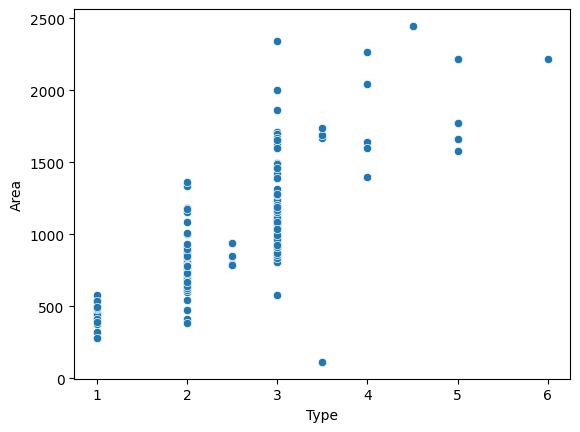

In [30]:
sns.scatterplot(df, x='Type', y='Area')

Type 6 could be considered as an outlier since there are only one such data point in the dataset. But here we vote to keep it as it is, since it follows the linear trend with other points

<Axes: xlabel='Price', ylabel='Area'>

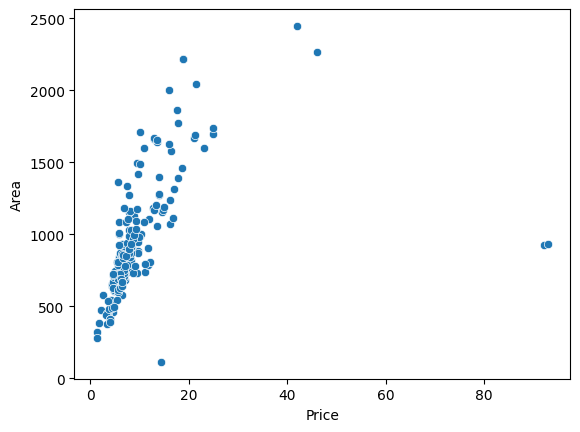

In [31]:
sns.scatterplot(df, x='Price', y='Area')

- In the Price-Area plot, we see that points above price 40 are clearly outliers
- Also data point of 3.5bhk have area 113sqft at price of 14.3 is illogical. This is definetly an data entry error.

In [32]:
# Removing prices above 40
# Removing data entry error points

df = df[(df['Price']<40) & (df['Area'] > 200)]
df[df['Area'] < 200]

,Sub-Area,Type,Area,Price,Company,Township,Township Area,ClubHouse,School,Hospital,Mall,Park,Pool,Gym


### Save Dataframe

In [33]:
df.to_csv("./data/cleaned_data.csv", index=False)